## Summary statistics

This notebook encompasses some statistics about suicide in 2014 as well as summary statistics of the dependent and explanatory variables.

In [1]:
%load_ext rpy2.ipython
import numpy as np
import pandas as pd

## Loading necessary R packages
%R library(ggplot2)
%R library(grid)

## Loading finalized datasets
legal = pd.read_csv('Legalization.csv')
suicides18_all_by_year = pd.read_csv('Suicides_males_18_total_per_year.csv')
suicides_all_by_year = pd.read_csv('Suicides_all_males_total_per_year.csv')

data18 = pd.read_csv('weighted_suicides.csv')
court18 = pd.read_csv('court_data.csv')

#### Brief facts about suicide in 2014 and summary statistics of the data

Suicide rates vary across race, gender and age as well as by geographical region and method of suicide. Nationally, older groups consistently have higher suicide rates than younger groups; males outnumber females in lethal attempts; whites outnumber minorities; and in 2014, half of suicides resulted from firearms[^1].The 2014 national suicide rate for the U.S. was 13.0 per 100,000 population[^2], 21.1 per 100,000 population for all males and 3.3 per 100,000 population for males 18 and under[^3]. In total, 1293 men under the age 18 died by suicide in 2014.

**Table I** tabulates the individual states that legalized same-sex marriage before January 2015. I only consider treatment states before 2015 because the Supreme Court legalized marriage equality across the nation mid-way through the year, confounding analysis for 2015.

**Table II** denotes the number of states that legalized same-sex marriage prior to Jan. 2015 by type of law: popular vote, legislature or state court decision. Twenty-four states legalized marriage equality by court decision, eight by legislature and three by popular vote. Recall that court-decision legalization is plausably more exogenous than other means, which leads to a more accurate analysis.

**Figure I** showcases the cumulative number of states that legalized same-sex marriage by the end of each year: 16 by the end of 2013 and 35 by the end of 2014. This aids identification because a greater number of 'treatment' states bolsters precision.

**Table III** displays summary statistics of the control variables for a random sample of the data. Income per capita is in dollars, and the unemployment rate (%) is seasonally adjusted. **Table IV** describes the number of observations and minimum as well as maximum values for each control variable and log of each. Both of these tables ensure reasonable values for the controls so to not have erroneous or outlier data.

The top panel of **Figure II** depicts the national suicide rates for males by year while the lower panel displays the national trends for males 18 and younger. Visiually, the trends differ in both magnitude and shape. Older males (which make up most of the 'all males' category) commit suicide for very different reasons than younger males. Thus, focusing on males 18 and younger reduces noise in the data and targets the most vulnerable population to discriminatory policies.

Lastly, as shown in **Figure III**, the distribution of suicide rates in the data has a long right tale (top panel) so that a log transformation is necessary to attain normality (bottom panel).

[^1]: https://afsp.org/about-suicide/suicide-statistics/
[^2]: http://www.cdc.gov/nchs/products/databriefs/db241.htm
[^3]: see national trends graphs below



In [2]:
## Table I: states that legalized same-sex marriage before January 2015
legal_prior = legal[legal.Year_Passed < 2015]
state_list = pd.DataFrame(legal_prior.values).loc[:, [0, 1, 2, 4]]
state_list.columns = ['State', 'Month', 'Year', 'Method']
state_list.sort_values( by = ['Year', 'Month'])

,State,Month,Year,Method
14,Massachusetts,5,2004,court
4,Connecticut,11,2008,court
10,Iowa,4,2009,court
29,Vermont,9,2009,legislature
18,New Hampshire,1,2010,legislature
21,New York,6,2011,legislature
12,Maine,12,2012,popvote
31,Washington,12,2012,popvote
13,Maryland,1,2013,popvote
2,California,6,2013,court


In [3]:
## Table II: Number of states that legalized same-sex marriage prior to Jan. 2015 by type of law
pd.DataFrame({'Method': ['Court', 'Legislature', 'Popular Vote'],
              'Number of States': legal_prior.groupby('Method')['State'].count().values})

,Method,Number of States
0,Court,24
1,Legislature,8
2,Popular Vote,3


In [7]:
##Cumulative count of states that legalized same-sex marriage by year, 2003 - 2015

grouped = state_list.groupby('Year')['State']
legal_count_by_year = pd.DataFrame({'Year': grouped.count().index.values, 'Count': grouped.count().values})
state_cumulative = {'Year': np.insert(legal_count_by_year.Year.values, 
                                      [0, 1, 1, 1, 8], [2003, 2005, 2006, 2007, 2015]),
                   'Num_States': np.insert(np.cumsum(legal_count_by_year.Count).values, 
                                           [0, 1, 1, 1, 8], [0, 1, 1, 1, 50])}
state_cumulative = pd.DataFrame(state_cumulative)

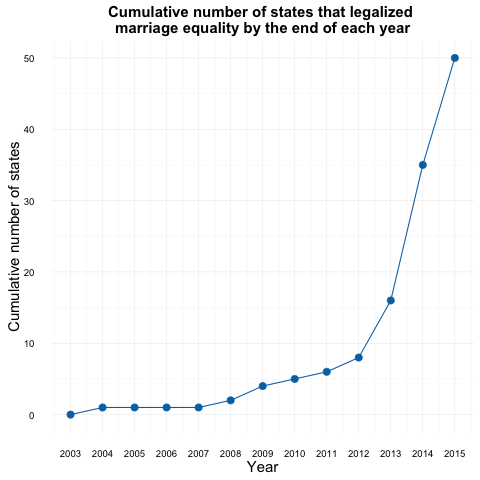

In [9]:
%%R -i state_cumulative
## Figure I: Cumulative number of states that legalized same-sex marriage by the end of each year

mytheme <- theme_minimal() + theme(plot.title = element_text(size = 15, face = 'bold'), 
                                   axis.title = element_text(size = 15))

ggplot(data = state_cumulative, aes(x = Year, y = Num_States)) + 
geom_point(size = 3, color = '#0072B2') + 
geom_line(color = '#0072B2') +
labs(title = 'Cumulative number of states that legalized \nmarriage equality by the end of each year', 
     y = 'Cumulative number of states') + 
scale_x_continuous(breaks = c(2003:2015)) + mytheme

In [11]:
## Table III: Sample of control variables table
controls = data18[['State', 'Year', 'income_cap', 'lninc_cap', 
                       'Unemployment', 'lnunemp', 'unemp_lag', 'lnunemp_lag']]

for col in controls.columns[2:8]:
    controls.loc[ :, col] = controls[col].round(2)


controls.columns = ['State', 'Year', 'Income per Capita', 
                                      'Log of Income per Capita', 
                                      'Unemploymment Rate', 
                                      'Log of Unemployment', 
                                      'Lagged Unemployment Rate', 
                                      'Log of Lagged Unemployment']

In [12]:
controls.sample(5)

,State,Year,Income per Capita,Log of Income per Capita,Unemploymment Rate,Log of Unemployment,Lagged Unemployment Rate,Log of Lagged Unemployment
740,Washington,2003,34663,10.45,7.41,2.00,7.41,2.00
295,Maine,2006,34019,10.43,4.58,1.52,4.88,1.59
376,Mississippi,2007,29543,10.29,6.09,1.81,6.54,1.88
339,Michigan,2002,30333,10.32,6.26,1.83,5.19,1.65
299,Maine,2010,37102,10.52,8.15,2.10,8.09,2.09


In [13]:
## Table IV: Number of observation as well as minimum and maximum values for each control variable

nobs = []
mins = []
maxs = []
means = []
SDs = []

for col in controls.columns[2:8]:
    nobs.append(controls[col].count())
    mins.append(controls[col].min())
    maxs.append(controls[col].max())
    means.append(controls[col].mean())
    SDs.append(controls[col].std())
    


contrls_des = pd.DataFrame([nobs, mins, maxs, means, SDs], 
                           index = ['N', 'Min', 'Max', 'Mean', 'SD'], 
                           columns = ['Income per Capita', 
                                      'Log of Income per Capita', 
                                      'Unemploymment Rate', 
                                      'Log of Unemployment', 
                                      'Lagged Unemployment Rate', 
                                      'Log of Lagged Unemployment'])
contrls_des = contrls_des.transpose()
contrls_des.N = contrls_des.N.astype(int, copy = True)
contrls_des.Min = contrls_des.Min.round(2)
contrls_des.Max = contrls_des.Max.round(2)
contrls_des.Mean = contrls_des.Mean.round(2)
contrls_des.SD = contrls_des.SD.round(2)

In [14]:
contrls_des

,N,Min,Max,Mean,SD
Income per Capita,800,20594.00,64864.00,36491.78,7713.97
Log of Income per Capita,800,9.93,11.08,10.48,0.21
Unemploymment Rate,800,2.30,13.66,5.79,2.05
Log of Unemployment,800,0.83,2.61,1.70,0.34
Lagged Unemployment Rate,750,2.30,13.66,5.80,2.09
Log of Lagged Unemployment,750,0.83,2.61,1.70,0.35


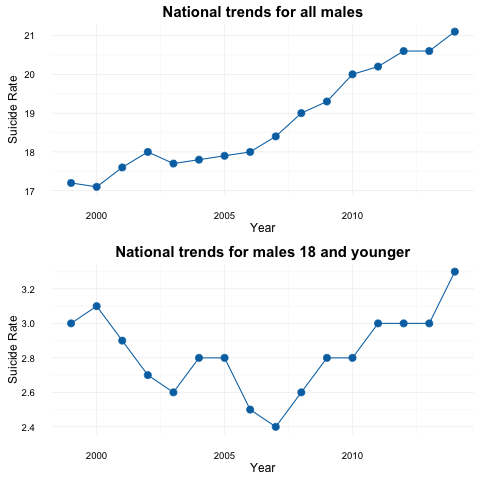

In [15]:
%%R -i suicides_all_by_year,suicides18_all_by_year

## Figure II: National suicide rates for males vs. males 18 and younger by year

q1 <- ggplot(suicides_all_by_year, aes(x = Year, y = Crude_Rate)) + 
geom_point(size = 3, color = '#0072B2') + 
geom_line(color = '#0072B2') +
labs( title = 'National trends for all males', y = 'Suicide Rate') + 
theme_minimal() + theme(plot.title = element_text(size = 15, face = 'bold'))

q2 <- ggplot(suicides18_all_by_year, aes(x = Year, y = Crude_Rate)) + 
geom_point(size = 3, color = '#0072B2') + 
geom_line(color = '#0072B2') +
labs(title = 'National trends for males 18 and younger', y = 'Suicide Rate') + 
theme_minimal() + theme(plot.title = element_text(size = 15, face = 'bold'))

grid.newpage()
grid.draw(rbind(ggplotGrob(q1), ggplotGrob(q2), size = "last"))

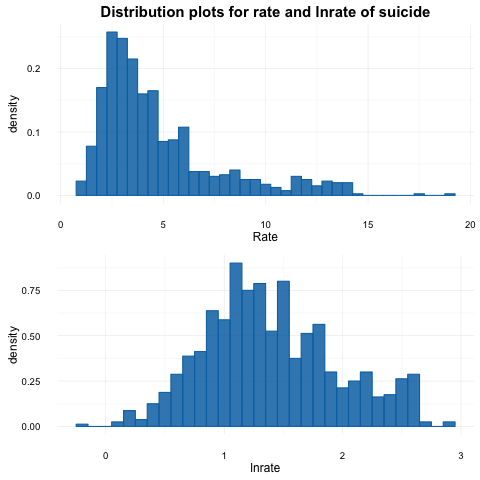

In [16]:
%%R -i data18

## Figure III: Rate of suicide and log rate of suicide distribution plots for males 18 and younger

p1 <- ggplot(data = data18, aes(x = Rate, y = ..density..)) + 
geom_histogram (alpha = .85, color = '#0072B2', fill = "#0072B2", binwidth = .5) + 
labs(title = 'Distribution plots for rate and lnrate of suicide') + 
theme_minimal() + theme(plot.title = element_text(size = 15, face = 'bold'))

p2 <- ggplot(data = data18, aes(x = lnrate, y = ..density..)) + 
geom_histogram (alpha = .85, color = '#0072B2', fill = '#0072B2', binwidth = .1) + theme_minimal()

grid.newpage()
grid.draw(rbind(ggplotGrob(p1), ggplotGrob(p2), size = "last"))